In [44]:
from bs4 import BeautifulSoup 
import requests 
import pandas as pd
import matplotlib.pyplot as plt
import re
from urllib.parse import urljoin
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC 
import numpy as np
import matplotlib

In [2]:
base_url = 'https://ru.wikipedia.org'


In [3]:
url = 'https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B0%D0%BA%D0%B8%D0%BC%D0%BE%D0%B2_%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D0%B9_%D0%9A%D0%B0%D0%B7%D0%B0%D1%85%D1%81%D1%82%D0%B0%D0%BD%D0%B0'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

In [4]:
# website = 'https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B0%D0%BA%D0%B8%D0%BC%D0%BE%D0%B2_%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D0%B9_%D0%9A%D0%B0%D0%B7%D0%B0%D1%85%D1%81%D1%82%D0%B0%D0%BD%D0%B0'
# path = r'C:Program Files (x86)\chromedriver.exe'
# service = Service(executable_path = 'chromedriver.exe')

# driver = webdriver.Chrome()
# driver.get(website)

In [5]:
# regions = soup.find_all(['div'], {'class' : 'mw-heading mw-heading2'})
regions = soup.find_all('h2') ##south kazakhstan region is an h3(so change the values of ulytau for south kz later 

In [6]:
region_mayors = pd.DataFrame(columns = ['name', 'region', 'worked', 'born'])

In [7]:
months = ['января', 'февраля', 'марта','апреля','мая', 'июня', 'июля', 'августа', 'сентября', 'октября', 'ноября', 'декабря']

In [8]:
def find(soup):
    month = soup.find_all('a', href = True, string = re.compile('|'.join(months), re.IGNORECASE))[0].text
    year = soup.find_all('a', href = True, string = re.compile(r"^19\d*"))[0].text

    # month = soup.find_all('a', href = True, text = [re.compile('|'.join(months), re.IGNORECASE), )[0].text
    # year = soup.find_all('a', href = True, string = re.compile('\19.*'))[0].text
    birthdate = month+' '+ year
    return birthdate

In [9]:
def get_next_page(urls):
    full_url = urljoin(base_url, urls)
    page = requests.get(full_url)
    soup = BeautifulSoup(page.text, 'html')
    # print(soup.text)
    birthdate  = find(soup)
    return birthdate
    

In [12]:
sections = soup.find_all(['ol'])

for region, section in zip(regions[2:18], sections[1:17]):
    # print(region.text)
    akims = section.find_all('li')
    for num, akim in enumerate(akims):
        #click on akim A, then find родился ин зэт текст 
        if akim.find('a', {'class': 'new'}): #passing on a single page that has no info inside Leonid....
            birthdate = None
        else:
            relative_url = akim.find('a', href = True)['href']
            try:
                birthdate = get_next_page(relative_url)
            except:
                birthdate = None
            # print(birthdate)
        # print(akim.find('a', href = True)['href'])
        new_row= pd.DataFrame({'name' : [akim.find('a').text], 'region': [region.text], 'worked': [akim.find(string = re.compile("\(.*"))], 'born': [birthdate]})
        # region_mayors= region_mayors.concat([akim.find('a').text, region.text, akim.find(string = re.compile("\(.*")), birthdate])
        region_mayors= pd.concat([region_mayors, new_row], ignore_index = True)

        #store the value in name 
        # print(akim.find('a').text)
        #text in worked 
        # print(akim.find(text = re.compile("\(.*")))
    # print(section.text)


<>:18: SyntaxWarning: invalid escape sequence '\('
<>:18: SyntaxWarning: invalid escape sequence '\('
C:\Users\User\AppData\Local\Temp\ipykernel_6096\542599380.py:18: SyntaxWarning: invalid escape sequence '\('
  new_row= pd.DataFrame({'name' : [akim.find('a').text], 'region': [region.text], 'worked': [akim.find(string = re.compile("\(.*"))], 'born': [birthdate]})


In [51]:
get_next_page('https://ru.wikipedia.org/wiki/%D0%91%D0%B5%D0%BA%D1%82%D0%B5%D0%BC%D0%B8%D1%81%D0%BE%D0%B2,_%D0%90%D0%BC%D0%B0%D0%BD%D0%B3%D0%B5%D0%BB%D1%8C%D0%B4%D1%8B_%D0%98%D0%BC%D0%B0%D0%BD%D0%B0%D0%BA%D1%8B%D1%88%D0%B5%D0%B2%D0%B8%D1%87')

16 февраля 1945


In [24]:
region_mayors

,name,region,worked,born
0,"Браун, Андрей Георгиевич",Акмолинская область,(1992—1997),14 февраля 1937
1,"Карибжанов, Жаныбек Салимович",Акмолинская область,(июль — декабрь 1997),23 ноября 1948
2,"Гартман, Владимир Карлович",Акмолинская область,(декабрь 1997 — сентябрь 1998),18 августа 1997
3,"Кулагин, Сергей Витальевич",Акмолинская область,(сентябрь 1998 — март 2004),27 мая 1998
4,"Есенбаев, Мажит Тулеубекович",Акмолинская область,(март 2004 — январь 2008),28 апреля 1999
...,...,...,...,...
148,"Шукеев, Умирзак Естаевич",Улытауская область,(сентябрь 2006 — 28 августа 2007),12 марта 1964
149,"Ашим, Нургали Садуакасович",Улытауская область,(28 августа 2007 — 4 марта 2009),10 октября 1959
150,"Мырзахметов, Аскар Исабекович",Улытауская область,(4 марта 2009 — 8 августа 2015),1 октября 1962
151,"Атамкулов, Бейбут Бакирович",Улытауская область,(8 августа 2015 — 7 октября 2016),19 мая 19 мая


In [17]:
region_mayors.to_csv('region.csv')

In [18]:
other = pd.read_csv('region.csv')

In [20]:
other.loc[other.name == 'Десятник, Леонид Васильевич']

,Unnamed: 0,name,region,worked,born
45,45,"Десятник, Леонид Васильевич",Восточно-Казахстанская область,(30 ноября 1995 — 10 апреля 1996),NaN


In [23]:
other.dropna()

,Unnamed: 0,name,region,worked,born
0,0,"Браун, Андрей Георгиевич",Акмолинская область,(1992—1997),14 февраля 1937
1,1,"Карибжанов, Жаныбек Салимович",Акмолинская область,(июль — декабрь 1997),23 ноября 1948
2,2,"Гартман, Владимир Карлович",Акмолинская область,(декабрь 1997 — сентябрь 1998),18 августа 1997
3,3,"Кулагин, Сергей Витальевич",Акмолинская область,(сентябрь 1998 — март 2004),27 мая 1998
4,4,"Есенбаев, Мажит Тулеубекович",Акмолинская область,(март 2004 — январь 2008),28 апреля 1999
...,...,...,...,...,...
148,148,"Шукеев, Умирзак Естаевич",Улытауская область,(сентябрь 2006 — 28 августа 2007),12 марта 1964
149,149,"Ашим, Нургали Садуакасович",Улытауская область,(28 августа 2007 — 4 марта 2009),10 октября 1959
150,150,"Мырзахметов, Аскар Исабекович",Улытауская область,(4 марта 2009 — 8 августа 2015),1 октября 1962
151,151,"Атамкулов, Бейбут Бакирович",Улытауская область,(8 августа 2015 — 7 октября 2016),19 мая 19 мая


In [33]:
nan_mask = other.isna()
#nan_df = df.applymap(pd.isna)
# Show rows with any NaN values
rows_with_nan = other[nan_mask.any(axis=1)]

In [34]:
rows_with_nan

,Unnamed: 0,name,region,worked,born


In [35]:
other.loc[other.name == 'Десятник, Леонид Васильевич', 'born'] = 1924

In [31]:
other= other.fillna(1935)

In [37]:
other.loc[other.name == 'Десятник, Леонид Васильевич'] 

,Unnamed: 0,name,region,worked,born
45,45,"Десятник, Леонид Васильевич",Восточно-Казахстанская область,(30 ноября 1995 — 10 апреля 1996),1924


In [38]:
other.loc[other.name == 'Новиков, Фёдор Афанасьевич'] 

,Unnamed: 0,name,region,worked,born
105,105,"Новиков, Фёдор Афанасьевич",Мангистауская область,(1992—1993),1935


In [39]:
other.to_csv('final_akims.csv')

In [4]:
akims = pd.read_csv('final_akims.csv', index_col = False)

In [91]:
akims.region.unique()

array(['Akmola region', 'Aktobe region', 'Almaty region', 'Atyrau region',
       'East Kazakhstan region', 'Zhambyl region', 'Zhetisu region',
       'West Kazakhstan region', 'Karagandy region', 'Kostanay region',
       'Kyzylorda region', 'Mangystau region', 'Pavlodar region',
       'North Kazakhstan region', 'Turkestan region',
       'South Kazakhstan region'], dtype=object)

In [90]:
akims.loc[akims.region == 'South Kazakhstan', 'region'] = 'South Kazakhstan region'
akims.loc[akims.region == 'Акмолинская область', 'region'] = 'Akmola region'
akims.loc[akims.region == 'Актюбинская область', 'region'] = 'Aktobe region'
akims.loc[akims.region == 'Алматинская область', 'region'] = 'Almaty region'
akims.loc[akims.region == 'Атырауская область', 'region'] = 'Atyrau region'
akims.loc[akims.region == 'Восточно-Казахстанская область', 'region'] = 'East Kazakhstan region'
akims.loc[akims.region == 'Жамбылская область', 'region'] = 'Zhambyl region'
akims.loc[akims.region == 'Жетысуская область', 'region'] = 'Zhetisu region'
akims.loc[akims.region == 'Западно-Казахстанская область', 'region'] = 'West Kazakhstan region'
akims.loc[akims.region == 'Карагандинская область', 'region'] = 'Karagandy region'
akims.loc[akims.region == 'Костанайская область', 'region'] = 'Kostanay region'
akims.loc[akims.region == 'Кызылординская область', 'region'] = 'Kyzylorda region'
akims.loc[akims.region == 'Мангистауская область', 'region'] = 'Mangystau region'
akims.loc[akims.region == 'Павлодарская область', 'region'] = 'Pavlodar region'
akims.loc[akims.region == 'Северо-Казахстанская область', 'region'] = 'North Kazakhstan region'
akims.loc[akims.region == 'Туркестанская область', 'region'] = 'Turkestan region'


In [1]:
def unpack_dates(year_range):
    years = year_range.strip(' (').strip(')').replace('——', ' ').replace('-', ' ').replace('–', ' ').replace('—', ' ').split()
    
    end = 2024
    unpacked  = [int(word) for word in years if word.isdigit() and len(word)==4]
    if len(unpacked)==2:
        return(list(range(unpacked[0], unpacked[1]+1)))
    elif len(unpacked)==1:
        if str(unpacked[0]).startswith('202'):
            return(list(range(unpacked[0], end+1)))
        else:
            return unpacked[0]



In [8]:
#applying a function to the dataframe 
akims['years_unpacked'] = akims['worked'].apply(unpack_dates)

In [11]:
akims['year_born'] = akims['born'].apply(unpack_dates)

In [103]:
by_regions = akims.loc[~akims.region.isin(['Turkestan region', 'Zhetisu region'])].groupby('region')

In [21]:
#manually enter birthdates for these people 
akims.loc[7, 'year_born'] = 1965
akims.loc[10, 'year_born'] = 1971
akims.loc[25, 'year_born'] = 1950
akims.loc[28, 'year_born'] = 1950
akims.loc[39, 'year_born'] = 1948
akims.loc[58, 'year_born'] = 1950
akims.loc[71, 'year_born'] = 1948
akims.loc[75, 'year_born'] = 1964
akims.loc[78, 'year_born'] = 1948
akims.loc[113, 'year_born'] = 1963
akims.loc[126, 'year_born'] = 1971
akims.loc[128, 'year_born'] = 1977
akims.loc[151, 'year_born'] = 1964

In [82]:
akims.loc[14, 'year_born'] = 1942

In [108]:
names = akims.name.unique()
akims_colors = {name: 0 for name in names}

In [129]:
akims.loc[akims.name =='Джакупов, Кабибулла Кабенович', 'year_born'] = 1949
akims.loc[akims.name =='Кушербаев, Крымбек Елеуович', 'year_born'] = 1955
akims.loc[akims.name =='Жакиянов, Галымжан Бадылжанович', 'year_born'] = 1963
akims.loc[akims.name =='Гартман, Владимир Карлович', 'year_born'] = 1947
akims.loc[akims.name =='Киинов, Ляззат Кетебаевич', 'year_born'] = 1949
akims.loc[akims.name =='Левитин, Вячеслав Леонидович', 'year_born'] = 1945
akims.loc[akims.name =='Баев, Николай Иванович', 'year_born'] = 1945
akims.loc[akims.name =='Мухамеджанов, Бауржан Алимович', 'year_born'] = 1960


In [139]:
akims.loc[akims.name =='Кулагин, Сергей Витальевич', 'year_born'] = 1952
akims.loc[akims.name =='Есенбаев, Мажит Тулеубекович', 'year_born'] = 1949
akims.loc[akims.name =='Чердабаев, Равиль Тажигариевич', 'year_born'] = 1940
akims.loc[akims.name =='Нуркадилов, Заманбек Калабаевич', 'year_born'] = 1944
akims.loc[akims.name =='Кулмаханов, Шалбай Кулмаханович', 'year_born'] = 1946
#
akims.loc[akims.name =='Баталов, Амандык Габбасович', 'year_born'] = 1952
akims.loc[akims.name =='Сагиндыков, Елеусин Наурызбаевич', 'year_born'] = 1947
akims.loc[akims.name =='Даукеев, Серикбек Жусупбекович', 'year_born'] = 1950
# akims.loc[akims.name =='Нуркадилов, Заманбек Калабаевич', 'year_born'] = 1944
# akims.loc[akims.name =='Кулмаханов, Шалбай Кулмаханович', 'year_born'] = 1946


In [150]:
# akims.loc[akims.year_born >= 1990] 
akims.loc[akims.region=='Kostanay region']

,Unnamed: 0.1,Unnamed: 0,name,region,worked,born,years_unpacked,year_born
87,87,87,"Укин, Кенжебек Укинович",Kostanay region,(1992—1993),26 июля 1940,"[1992, 1993]",1940
88,88,88,"Турсумбаев, Балташ Молдабаевич",Kostanay region,(1993—1995),24 октября 1946,"[1993, 1994, 1995]",1946
89,89,89,"Кадамбаев, Токтарбай Кадамбаевич",Kostanay region,(1995—1998),13 июля 1944,"[1995, 1996, 1997, 1998]",1944
90,90,90,"Шукеев, Умирзак Естаевич",Kostanay region,(август 1998 — март 2004),12 марта 1964,"[1998, 1999, 2000, 2001, 2002, 2003, 2004]",1964
91,91,91,"Кулагин, Сергей Витальевич",Kostanay region,(март 2004 — январь 2012),27 мая 1998,"[2004, 2005, 2006, 2007, 2008, 2009, 2010, 201...",1952
92,92,92,"Садуакасов, Нуралы Мустафинович",Kostanay region,(20 января 2012 — 11 сентября 2015),20 января 1964,"[2012, 2013, 2014, 2015]",1964
93,93,93,"Мухамбетов, Архимед Бегежанович",Kostanay region,(11 сентября 2015 — 1 декабря 2022),11 сентября 1972,"[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]",1972
94,94,94,"Аксакалов, Кумар Иргибаевич",Kostanay region,(с 1 декабря 2022),1 декабря 1965,"[2022, 2023, 2024]",1965


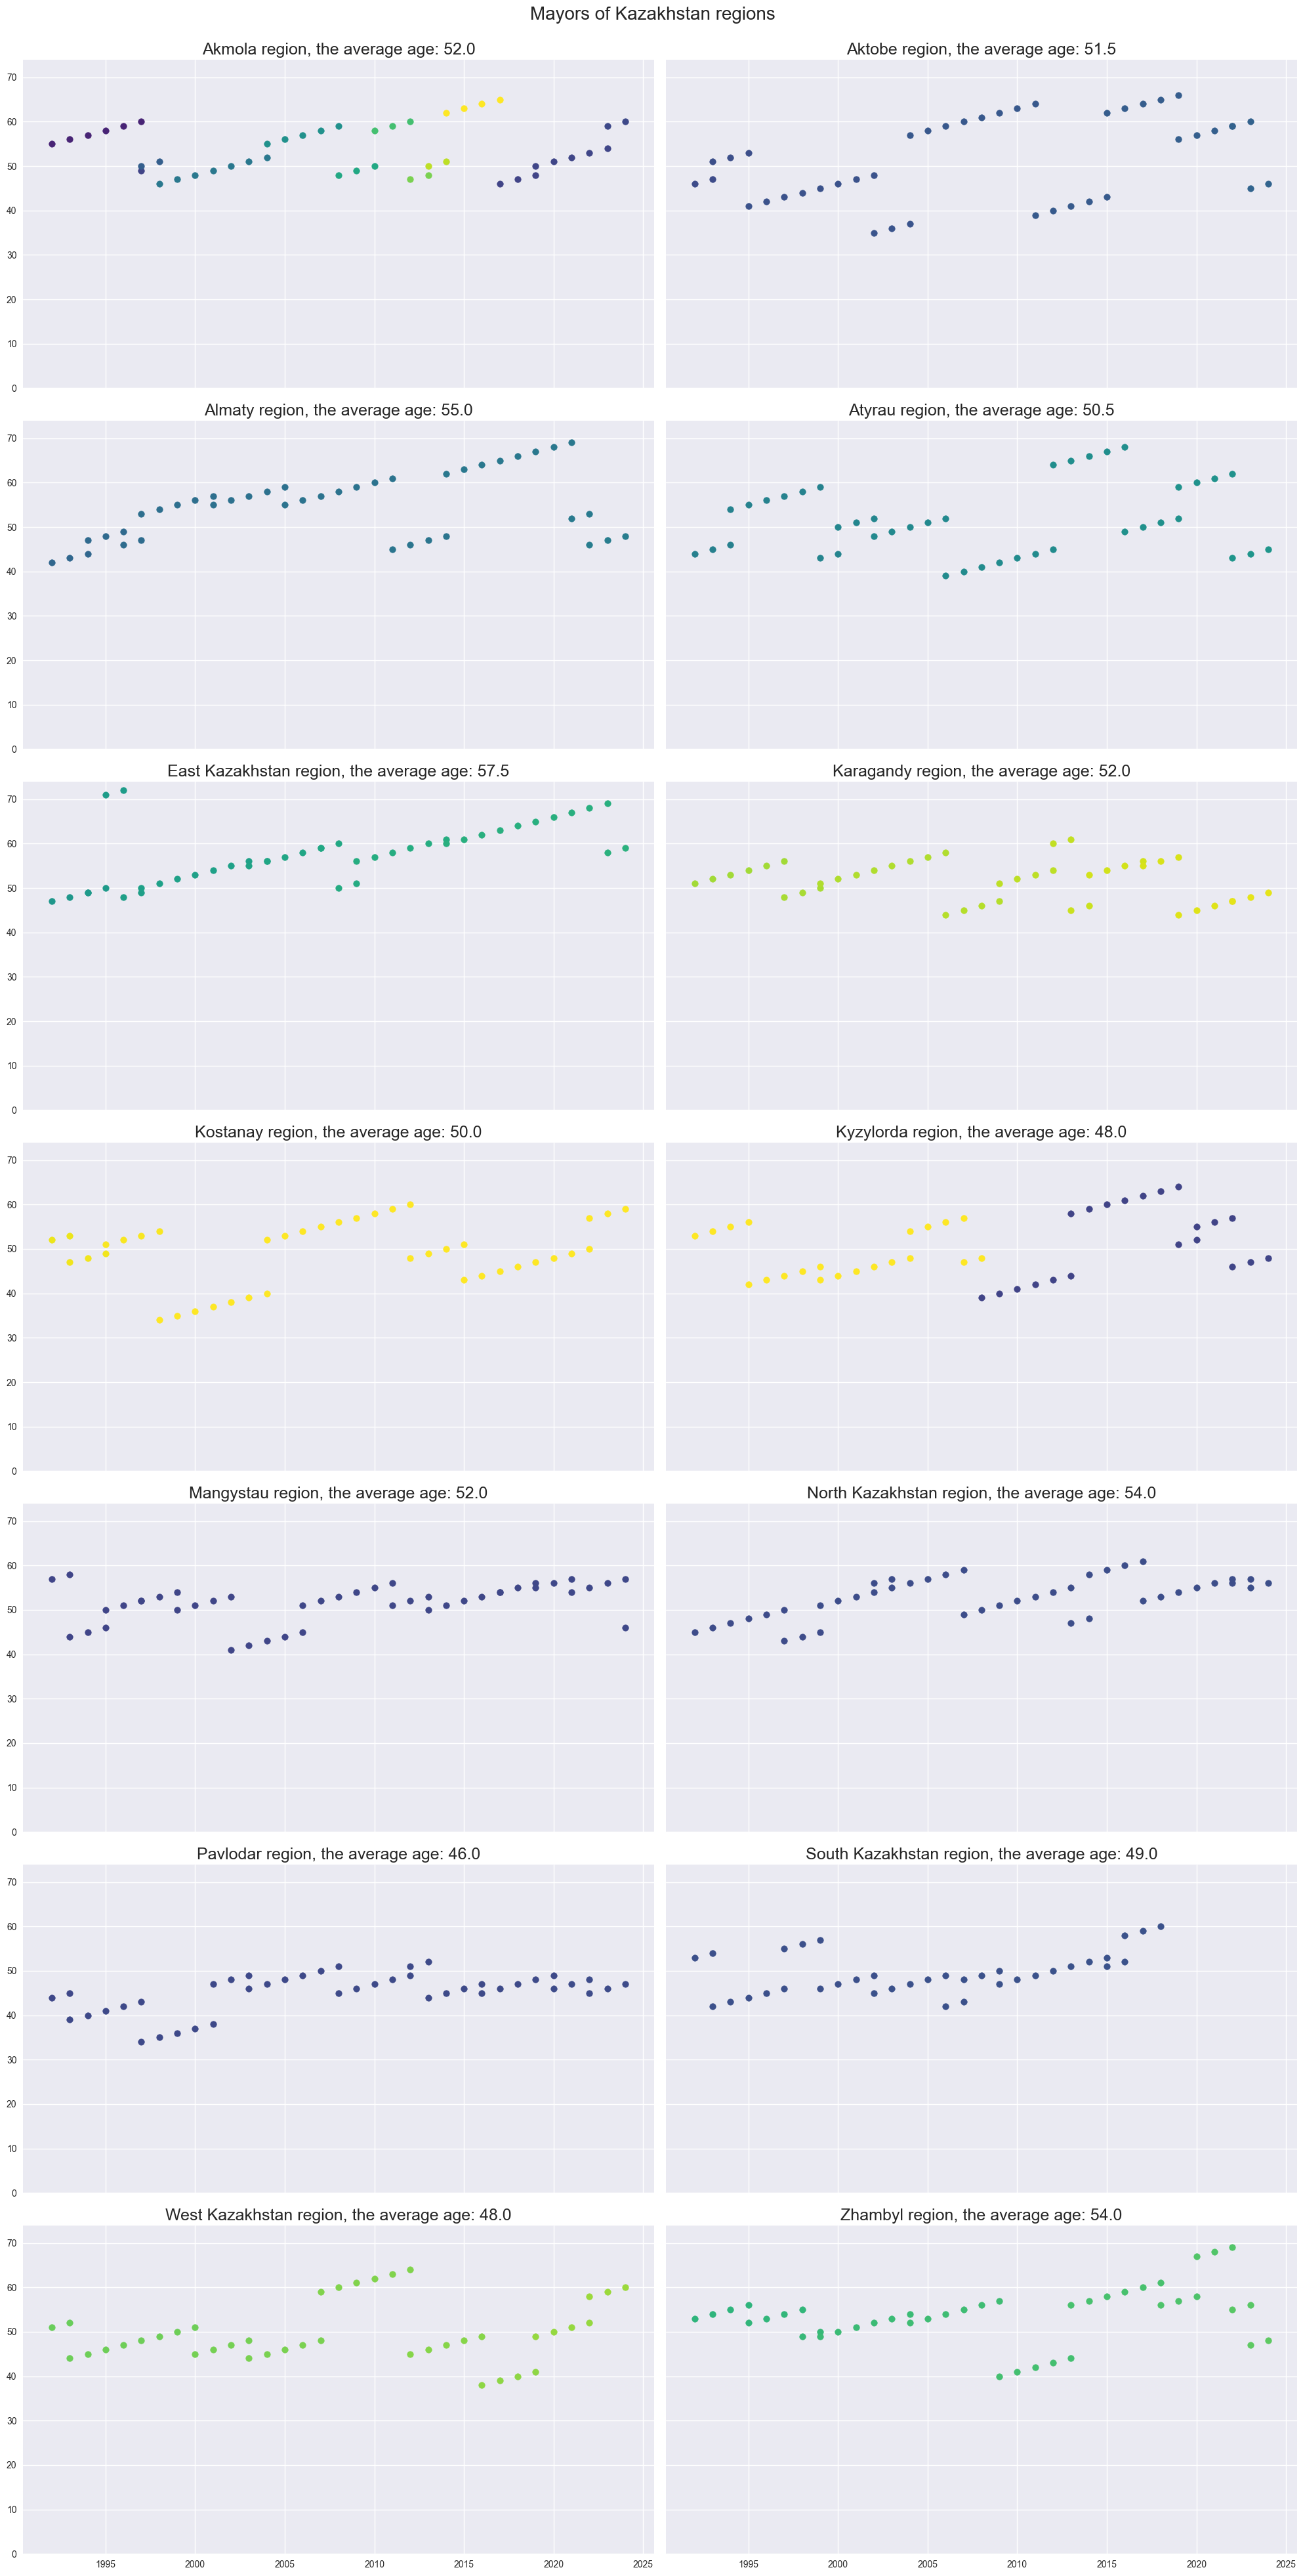

In [161]:
plt.style.use('seaborn-v0_8')

fig, axs = plt.subplots(7, 2, figsize = (20, 40), sharex = True, sharey = True)
axs = axs.flatten()  
colormap = matplotlib.colormaps.get_cmap('viridis')
# total= pd.DataFrame(columms = ['regions', 'mean'])

for i, (region, group) in enumerate(by_regions):
    ax = axs[i]
    mean = []
    for idx, row in akims.loc[akims.region == region].iterrows():
        # check for the name in the dictionary to assign the color specific to it 
        # if akims_colors[row.name] == 0:
        #     color = colormap(int(f'0.{idx}'))
        #     akims_colors[row.name] = color
        # else:
        #     color = akims_colors[row.name]
        # print(row['name'])
        color = colormap(float(f'0.{idx}') + 0.1)
        years = row.years_unpacked
        born = row.year_born
        
        if isinstance(years, list) :
            ages = [year - born for year in years]
            for age in ages:
                mean.append(age)
        elif isinstance(years, int):
            ages = years - born
            mean.append(ages)
            
        ax.scatter(years, ages, color = color,  label=f'{row['name']}')
    ax.set_title(f'{region}, the average age: {np.median(mean)}', fontsize = 18)
    # ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)

ax.set_ylim(bottom=0)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle("Mayors of Kazakhstan regions", fontsize=20)
plt.savefig('region_mayors_final.png')

plt.show()

In [158]:
akims.to_csv('this_ONE_FINAL_I_SWEAR.csv')